# 3.05 Melody On Off

* Dependent on meteorological data a voice is set on or off.
* This is handy for a meteorological parameter like global radiation. At night there is no global radiation and therefore it is zero. To prevent that the same tone is repeated over and over again the voice can be paused.
* Weather period from the 1.8.2019 to 28.8.2019



In [74]:
from pyknon.genmidi import Midi
from pyknon.music import Rest, Note, NoteSeq
from music_generation import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from datetime import date

### Read Meteorological Data

In [75]:
def read_meteo_data(fName):
    colNames = ['Stao','time', 'T_Boden_20cm', 'Flash_30km', 'Glob_rad', 'QFE','T_2m','Rain_Sum','H_rel','visibi','V_wind','direction_wind']  
    df = pd.read_csv(fName,sep=';', skiprows=3, names=colNames, na_values='-')
    print(df.head())
    return df

fPath = '/mnt/daten/04_Schule/42_Kanti/Matrua/Music_generation/Organisation/MeteoSchweiz/Daten/'
fName = 'order_75330_data.txt'
dM = read_meteo_data(fPath+fName)

NT, MP = dM.shape

  Stao          time  T_Boden_20cm  Flash_30km  Glob_rad    QFE  T_2m  \
0  KLO  201908010000          21.5           0         2  969.5  15.3   
1  KLO  201908010010          21.5           0         2  969.5  14.9   
2  KLO  201908010020          21.5           0         2  969.5  14.6   
3  KLO  201908010030          21.5           0         2  969.5  14.6   
4  KLO  201908010040          21.4           0         2  969.6  13.7   

   Rain_Sum  H_rel   visibi  V_wind  direction_wind  
0       0.0   80.4  20000.0     0.9             117  
1       0.0   82.4  20000.0     1.1              98  
2       0.0   83.7  20000.0     1.0             121  
3       0.0   82.7  20000.0     1.2             119  
4       0.0   88.8  20000.0     1.0             173  


### Chords and scales

In [76]:
C     = np.array([ 0, 4, 7])
Cm    = np.array([ 0, 3, 7])
Cdim  = np.array([ 0, 3, 6])

CM7   = np.array([ 0, 4, 7, 11])
C7    = np.array([ 0, 4, 7, 10])
Cm7   = np.array([ 0, 3, 7, 10])
Cdim7 = np.array([ 0, 3, 6, 10])
Cdim6 = np.array([ 0, 3, 6, 9 ])
C6    = np.array([ 0, 4, 7, 9 ]) # inversion of Am7
Cm6   = np.array([ 0, 3, 7, 9 ])

Csus4 = np.array([ 0, 5, 7])
Csus2 = np.array([ 0, 2, 7])
Csus47= np.array([ 0, 5, 7, 10])

P = np.array([ 0,7])  # Power chord (Perfect unison, Perfect fifth)
B = np.array([ 0])    # Bass (Perfect unison)

major = np.array([ 0, 2, 4, 5, 7, 9, 11])
minor = np.array([ 0, 2, 3, 5, 7, 8, 10])
blues = np.array([ 0, 3, 5, 6, 7, 10])

### on_off

* Mutes and unmutes voices dependent of the meteorological input data.
* With on_range defines when a voice plays.
* on_off is applied after the met_transform. So the on_range must be adjusted accordingly.


In [77]:
def on_off(meteo, on_range, volumes, rythem, mpb):
    met_resolution = 10 
    cum_ryth = np.concatenate((np.asarray([0]),np.cumsum(rythem)))[:-1]   # add 0 at beginig remove last element
    i_data = (cum_ryth*4 * (mpb /met_resolution)).astype(int)               # calculate index of the data
    for npn in range(len(i_data)):                  
        value = meteo[ i_data[npn] ]                  # get value of the meteo data
        if on_range[0] < value < on_range[1]: pass    # do nothing when in on_range
        else:  volumes[npn] = 0                       # set volume to zero when out of range
    
    return volumes

## tune 305_A

* Period from the 11.8 to 15.8.2019.
* Temperature and pressure played by pianos.
* Timpani regulated by the rain.
* A Music box plays the melody of the global radiation. During night the melody is paused.


In [153]:
def tune_305_A():
    tune_name = 'tune_305_A'  
    np.random.seed(80)
    bar, bpb      = 20, 4     # bar: Takt , bpb: beat per bar
    s_day, s_hour = 10, 12   # Start point in the data
    mpb     =  80            # minutes per beat
    end_dur =  0
    melody_len, start = print_dur(bar,bpb,mpb,s_day,s_hour,tune_name)

    trans = met_transform(dM,[1,1,0.025,3,1.3,500,0.2,1,4.5,1,],[6,6,6,6,6,24,6,6,6,2],start)
    
    scales = [[8,'C',major]]
    end_scale = [[1,'C',P]]
    pattern = pattern_gen(scales, end_scale, melody_len)

    # Pressure
    rythem1, notenr_1 = ran_duration([1/32,1/8, 1/4,1/2], [0,2,3,1], melody_len, end_dur)
    melody1 = meteo_melody(trans[3],pattern, 42, notenr_1, rythem1,mpb)
    volumes1 = ran_volume([0,90], [1,8], notenr_1 )
    notes1 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody1,rythem1,volumes1)] )
    
    # temp
    rythem2, notenr_2 = ran_duration([1/16,1/8, 1/4,1/2], [0,2,3,2], melody_len, end_dur)
    melody2 = meteo_melody(trans[4],pattern, 80, notenr_2, rythem2,mpb)
    volumes2 = ran_volume([0,90], [1,8], notenr_2 )
    notes2 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody2,rythem2,volumes2)] )
    
    #timpani rain
    melody3, rythem3, volumes3 = drum([1/16], [60,63],[100,127],melody_len) 
    volumes3 = met_vol(trans[5],0,rythem3, mpb)
    notes3 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody3,rythem3,volumes3)] )
    
    # glob radation
    rythem4, notenr_4 = ran_duration([1/32,1/16,1/8, 1/4,], [0,3,1,0], melody_len, end_dur)
    melody4 = meteo_melody(trans[2],pattern, 90, notenr_4, rythem4, mpb)
    volumes4 = ran_volume([0,80], [0,8], notenr_4 )
    volumes4 = on_off(trans[2],[5,20000],volumes4, rythem4, mpb)
    notes4 = NoteSeq( [Note(no,octave=0, dur=du, volume=vo) for no,du,vo in zip(melody4,rythem4,volumes4)] )
    
    instruments = [0,0,47,10]
    notes = [notes1,notes2,notes3,notes4]
    return notes, instruments,tune_name

__Instruments:__
Available are at lest the 128 General-Midi (GM) Instruments. Depending on the sound-fonts there is a bigger choice. A list of the GM instruments can be found here. https://jazz-soft.net/demo/GeneralMidi.html


## Generate Midi and Audio file

In [154]:
def gen_midi():
#     squezze into a MIDI framework
    notes, instruments, tune_name = tune_305_A() #  <--- select a tune  <<--     <<<<<<<<<--- select a tune -----
    nTracks = len(notes)
    
    m = Midi(number_tracks=nTracks, tempo=120, instrument=instruments)
    for iTrack in range(nTracks):
        m.seq_notes(notes[iTrack], track=iTrack)

    #--- write the MIDI file -----
    midi_file_name = tune_name +'.mid'   # set the name of the file
    m.write(midi_file_name)
    return midi_file_name

tune_305_A: Start: 10 day 12 h   End: 14.0 day 22.666666666666686 h


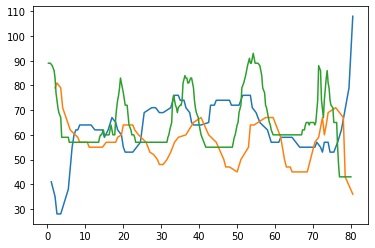

In [155]:
######---  Main  ---######
midi_file_name = gen_midi()

midi_play(midi_file_name)
midi_audio(midi_file_name)
midi_png(midi_file_name)


### External __Music_Generation__ library
This library changes from version to version. New or changed code is first explained above. This is a copy of music_generation.py 